Importamos las bibliotecas que vamos a ocupar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Clean

Empezamos con la limpieza de datos, para eso vamos a importar los datos que vamos a ocupar

In [2]:
train_hp=pd.read_csv('Datos/train.csv') #Datos de entrenamiento
train_hp.head(20) #Cabecera de esos datos

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
train_hp.shape[0]

1460

In [4]:
test_hp=pd.read_csv('Datos/test.csv') #datos de prueba
test_hp.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_hp.shape # los datos de entrenamiento tienen 1460 filas y 81 columnas

(1460, 81)

In [6]:
incompletos= []
for i,j in zip(train_hp.columns,train_hp.count()):
    if j!=train_hp.shape[0]:
        incompletos.append(i)
        

incompletos

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
for column in incompletos: #checamos cuantos datos le faltan a las columnas que estan en incompletos
    print('Datos faltantes de {0}: {1}'.format(column, train_hp[column].isnull().sum()))

Datos faltantes de LotFrontage: 259
Datos faltantes de Alley: 1369
Datos faltantes de MasVnrType: 8
Datos faltantes de MasVnrArea: 8
Datos faltantes de BsmtQual: 37
Datos faltantes de BsmtCond: 37
Datos faltantes de BsmtExposure: 38
Datos faltantes de BsmtFinType1: 37
Datos faltantes de BsmtFinType2: 38
Datos faltantes de Electrical: 1
Datos faltantes de FireplaceQu: 690
Datos faltantes de GarageType: 81
Datos faltantes de GarageYrBlt: 81
Datos faltantes de GarageFinish: 81
Datos faltantes de GarageQual: 81
Datos faltantes de GarageCond: 81
Datos faltantes de PoolQC: 1453
Datos faltantes de Fence: 1179
Datos faltantes de MiscFeature: 1406


In [8]:
basura = ['PoolQC', 'Fence','MiscFeature', 'FireplaceQu', 'Alley']
train_hp=train_hp.drop(basura, 1)
        

In [9]:
incompletos= []
for i,j in zip(train_hp.columns,train_hp.count()):
    if j!=train_hp.shape[0]:
        incompletos.append(i)
        

incompletos

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [10]:
for column in incompletos: #checamos cuantos datos le faltan a las columnas que estan en incompletos
    print('Datos faltantes de {0}: {1}'.format(column, train_hp[column].isnull().sum()))

Datos faltantes de LotFrontage: 259
Datos faltantes de MasVnrType: 8
Datos faltantes de MasVnrArea: 8
Datos faltantes de BsmtQual: 37
Datos faltantes de BsmtCond: 37
Datos faltantes de BsmtExposure: 38
Datos faltantes de BsmtFinType1: 37
Datos faltantes de BsmtFinType2: 38
Datos faltantes de Electrical: 1
Datos faltantes de GarageType: 81
Datos faltantes de GarageYrBlt: 81
Datos faltantes de GarageFinish: 81
Datos faltantes de GarageQual: 81
Datos faltantes de GarageCond: 81


In [11]:
train_hp[incompletos].head() # solo para visualizar

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [12]:
len(incompletos) # Al final nos quedamos con 14 Datos

14

Seleccionamos las columnas de los datos incompletos y los llenamos con el pomedio de la columna
como primera aproximación

In [13]:
for columna in incompletos:
    if train_hp[columna].dtypes=='float64':
        train_hp[columna]=train_hp[columna].fillna(train_hp[columna].mean())

In [14]:
train_hp[incompletos].head(10)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.000000,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.000000,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.000000,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.000000,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.000000,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.000000,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.000000,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
7,70.049958,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,1973.0,RFn,TA,TA
8,51.000000,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.000000,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA


Ahora seleccionamos los datos que contengan valores categoricos

In [15]:
categoricos=[]
for columna in incompletos:
    if train_hp[columna].dtypes=='object':
        categoricos.append(columna)
train_hp[categoricos].head()
categoricos

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Para una visualización sencilla, graficamos las diferentes categorias que hay en una gráfica de barras

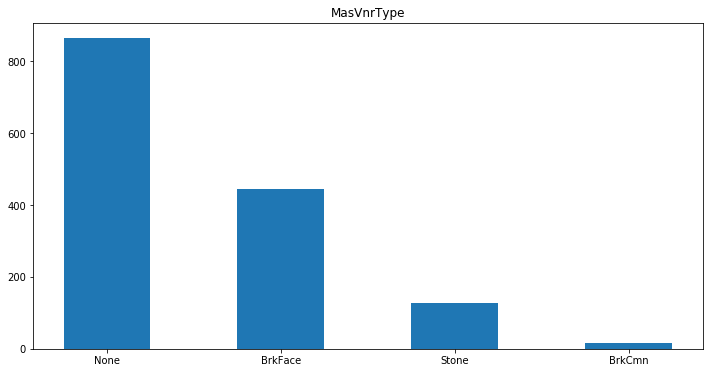

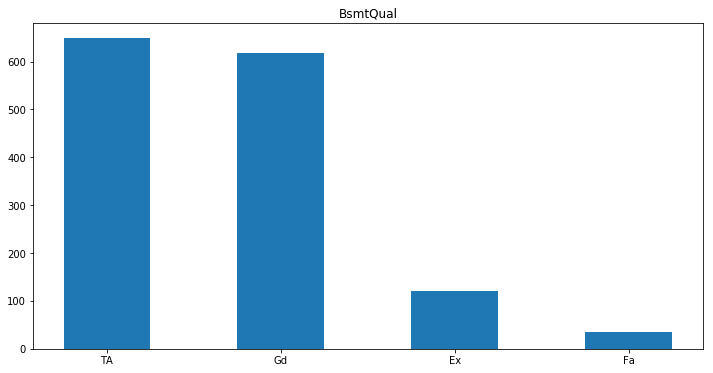

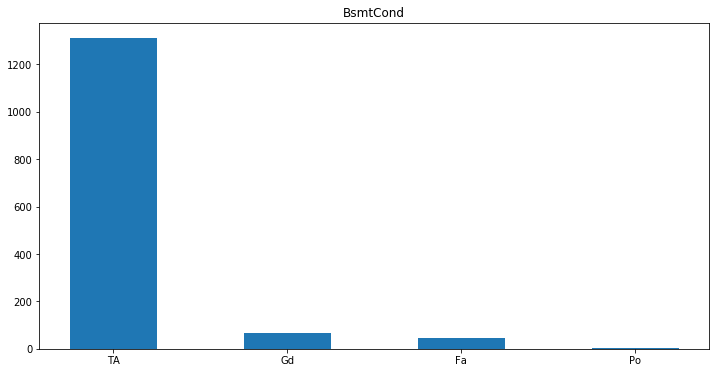

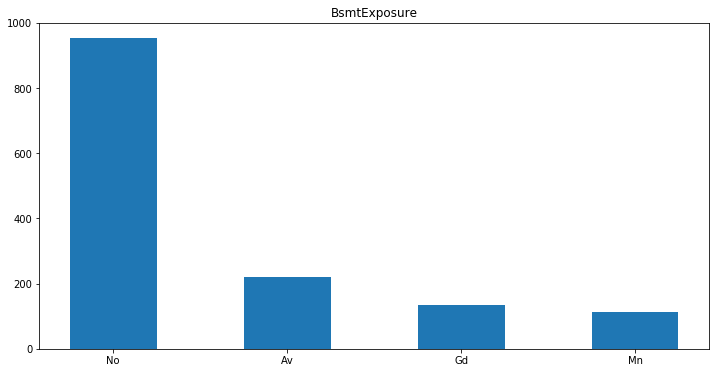

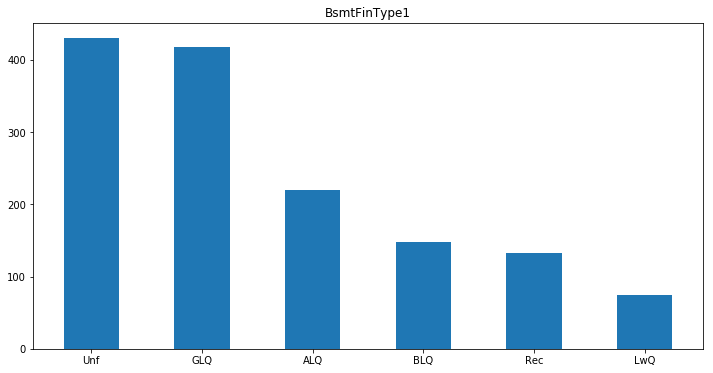

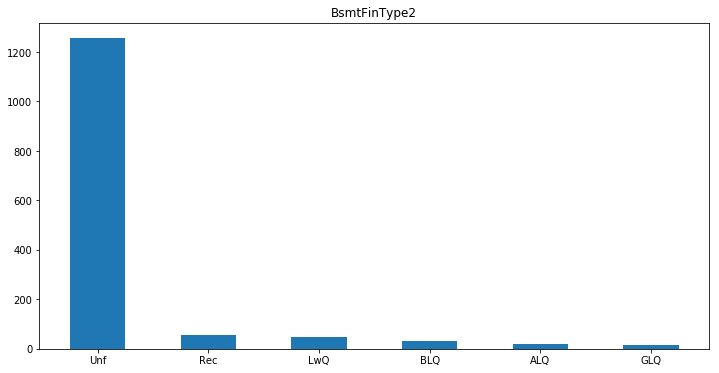

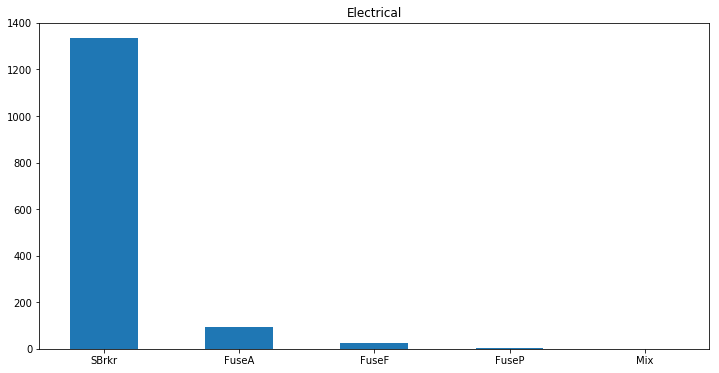

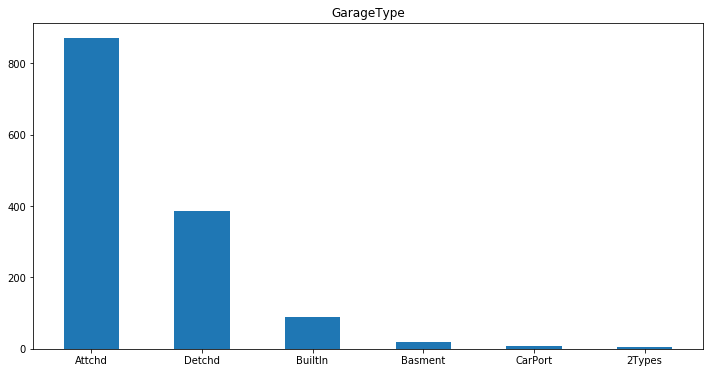

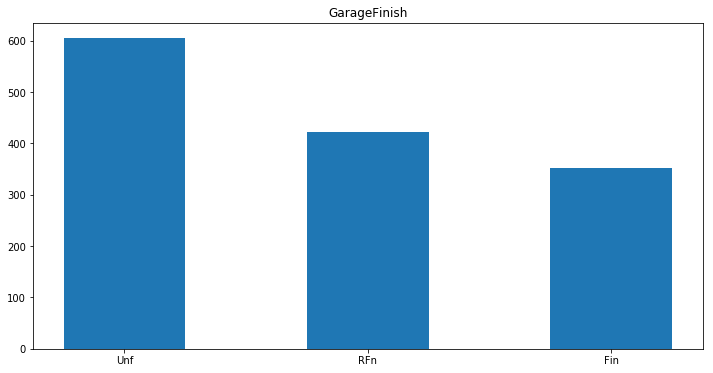

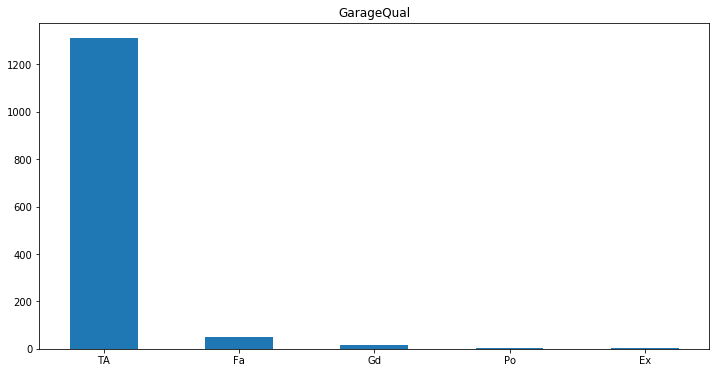

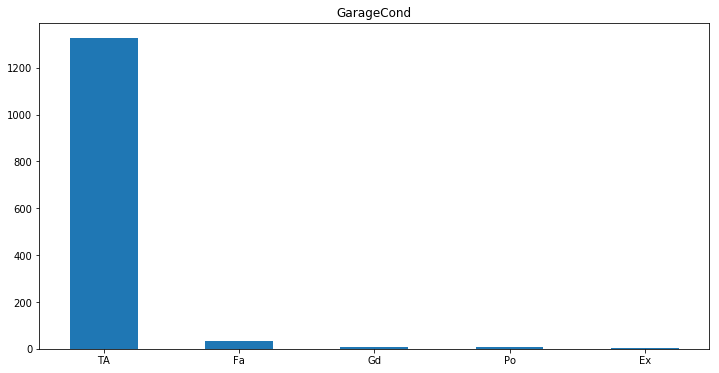

In [16]:
for categoria in categoricos:
    plt.figure(figsize=(12,6))
    plt.bar(x= train_hp[categoria].value_counts().index,
            height=train_hp[categoria].value_counts(), width=0.5 )
    plt.title('%s'%categoria)
    plt.show()
    plt.close()

Para los valores que hagan falta en 'Categoricos', los vamos a llenar con los valores de mayor frecuencia en la columna

In [17]:
for categoria in categoricos:
    mayor_val = train_hp[categoria].value_counts().index[0]
    train_hp[categoria] = train_hp[categoria].fillna(mayor_val)

In [18]:
for column in incompletos:
    print('Datos faltantes de {0}: {1}'.format(column, train_hp[column].isnull().sum()))

Datos faltantes de LotFrontage: 0
Datos faltantes de MasVnrType: 0
Datos faltantes de MasVnrArea: 0
Datos faltantes de BsmtQual: 0
Datos faltantes de BsmtCond: 0
Datos faltantes de BsmtExposure: 0
Datos faltantes de BsmtFinType1: 0
Datos faltantes de BsmtFinType2: 0
Datos faltantes de Electrical: 0
Datos faltantes de GarageType: 0
Datos faltantes de GarageYrBlt: 0
Datos faltantes de GarageFinish: 0
Datos faltantes de GarageQual: 0
Datos faltantes de GarageCond: 0


In [19]:
train_hp.shape

(1460, 76)

In [20]:
train_hp.head(20)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [21]:
train_hp.drop('Id', 1, inplace=True)

In [22]:
train_hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
columnas = train_hp.columns.tolist()
nulos=0
for col in columnas:
    nulos = nulos + train_hp[col].isnull().sum() 
print('Valores nulos totales: %d'%nulos )

Valores nulos totales: 0


In [24]:
len(pd.get_dummies(train_hp[categoricos]).columns)

52

In [25]:
numeric = []
for col in columnas:
    if train_hp[col].dtypes =='float64' or train_hp[col].dtypes =='int64':
        numeric.append(col)
train_hp[numeric].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [26]:
data = pd.concat([train_hp[numeric], pd.get_dummies(train_hp[categoricos])], axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
data.shape

(1460, 89)

In [28]:
Y = data['SalePrice']
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [29]:
predictoras = []
for col in data.columns.tolist():
    if col == 'SalePrice':
        pass
    else:
        predictoras.append(col)

In [30]:
X = data[predictoras]
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,1


# Aquí termina la limpieza de datos

# Usando Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
forest = RandomForestRegressor(n_estimators=10000, max_depth=10, random_state=0)

In [33]:
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
car_imp = list((zip(predictoras,forest.feature_importances_)))
#car_imp =np.array(car_imp)


In [35]:
def takeSecond(elem):
    return elem[1]

sortedList = sorted(car_imp, key=takeSecond, reverse=True)
sortedList

[('OverallQual', 0.5890226527002613),
 ('GrLivArea', 0.11244609851458265),
 ('TotalBsmtSF', 0.04173556350311667),
 ('2ndFlrSF', 0.03613132405617372),
 ('BsmtFinSF1', 0.029585755362740253),
 ('1stFlrSF', 0.023810155832631075),
 ('GarageCars', 0.0208097447306644),
 ('GarageArea', 0.01656435389829855),
 ('LotArea', 0.014261870356744507),
 ('YearBuilt', 0.01081504157939372),
 ('LotFrontage', 0.007918017058316885),
 ('YearRemodAdd', 0.007843372222289202),
 ('TotRmsAbvGrd', 0.007452916554137733),
 ('MasVnrArea', 0.005893312697791163),
 ('OverallCond', 0.005777365416379809),
 ('BsmtUnfSF', 0.005508642917462219),
 ('OpenPorchSF', 0.005504963756248816),
 ('FullBath', 0.0054622463082161675),
 ('GarageYrBlt', 0.0052926343124350735),
 ('WoodDeckSF', 0.0050095760829861),
 ('GarageFinish_Unf', 0.0040250034986757935),
 ('Fireplaces', 0.0037744866258102847),
 ('BsmtQual_Ex', 0.0037682412656879554),
 ('MoSold', 0.0037201340890051495),
 ('GarageType_Detchd', 0.002519913707558868),
 ('BedroomAbvGr', 0.00

# Cargando datos de prueba

In [36]:
test_hp = pd.read_csv('Datos/test.csv')
test_hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
test_hp.shape

(1459, 80)

In [38]:
incompletos_test = []
for i,j in zip(test_hp.columns,test_hp.count()):
    if j!=test_hp.shape[0]:
        incompletos_test.append(i)
        #print(i,j)

incompletos_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [39]:
test_hp.shape

(1459, 80)

In [40]:
for column in incompletos_test:
    print('Datos faltantes de {0}: {1}'.format(column, test_hp[column].isnull().sum()))

Datos faltantes de MSZoning: 4
Datos faltantes de LotFrontage: 227
Datos faltantes de Alley: 1352
Datos faltantes de Utilities: 2
Datos faltantes de Exterior1st: 1
Datos faltantes de Exterior2nd: 1
Datos faltantes de MasVnrType: 16
Datos faltantes de MasVnrArea: 15
Datos faltantes de BsmtQual: 44
Datos faltantes de BsmtCond: 45
Datos faltantes de BsmtExposure: 44
Datos faltantes de BsmtFinType1: 42
Datos faltantes de BsmtFinSF1: 1
Datos faltantes de BsmtFinType2: 42
Datos faltantes de BsmtFinSF2: 1
Datos faltantes de BsmtUnfSF: 1
Datos faltantes de TotalBsmtSF: 1
Datos faltantes de BsmtFullBath: 2
Datos faltantes de BsmtHalfBath: 2
Datos faltantes de KitchenQual: 1
Datos faltantes de Functional: 2
Datos faltantes de FireplaceQu: 730
Datos faltantes de GarageType: 76
Datos faltantes de GarageYrBlt: 78
Datos faltantes de GarageFinish: 78
Datos faltantes de GarageCars: 1
Datos faltantes de GarageArea: 1
Datos faltantes de GarageQual: 78
Datos faltantes de GarageCond: 78
Datos faltantes de

In [41]:
basura = ['PoolQC', 'Fence','MiscFeature', 'FireplaceQu', 'Alley']
test_hp=test_hp.drop(basura, 1)

In [42]:
incompletos_test = []
for i,j in zip(test_hp.columns,test_hp.count()):
    if j!=test_hp.shape[0]:
        incompletos_test.append(i)
        #print(i,j)

incompletos_test

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [43]:
Identificacion=test_hp['Id']
Identificacion.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [44]:
test_hp.drop('Id', 1, inplace=True)

In [45]:
incompletos_test = []
for i,j in zip(test_hp.columns,test_hp.count()):
    if j!=test_hp.shape[0]:
        incompletos_test.append(i)
        #print(i,j)

incompletos_test

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [46]:
for columna in incompletos_test:
    if test_hp[columna].dtypes=='float64':
        test_hp[columna]=test_hp[columna].fillna(test_hp[columna].mean())

In [47]:
categoricos_test=[]
for columna in incompletos_test:
    if test_hp[columna].dtypes=='object':
        categoricos_test.append(columna)
test_hp[categoricos_test].head()
len(categoricos_test)

17

In [48]:
for categoria in categoricos_test:
    mayor_val = test_hp[categoria].value_counts().index[0]
    test_hp[categoria] = test_hp[categoria].fillna(mayor_val)

In [49]:
columnas = test_hp.columns.tolist()
numeric = []
for col in columnas:
    if test_hp[col].dtypes =='float64' or test_hp[col].dtypes =='int64':
        numeric.append(col)
test_hp[numeric].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [50]:
data_test = pd.concat([test_hp[numeric], pd.get_dummies(test_hp[categoricos_test])], axis=1)

In [51]:
data.shape

(1460, 89)

In [52]:
data_test.shape

(1459, 136)

In [53]:
columnas_train = X.columns.tolist()
len(columnas_train)

88

In [54]:
columnas_test = data_test.columns.tolist()
len(columnas_test)

136

In [55]:
len(X.columns.tolist())

88

In [56]:
faltantes = []
coincidentes = []
for col in columnas_test:
    #print(col)
    if (col in columnas_train)== False:
        #print(False)
        faltantes.append(col)
    else:
        coincidentes.append(col)
print(len(faltantes),len(coincidentes))
    

54 82


In [57]:
faltan=[]
for _ in X.columns.tolist():
    #print(_, 'KJ')
    if (_ in coincidentes) == False:
        faltan.append(_)
faltan, len(faltan)

(['Electrical_FuseA',
  'Electrical_FuseF',
  'Electrical_FuseP',
  'Electrical_Mix',
  'Electrical_SBrkr',
  'GarageQual_Ex'],
 6)

In [58]:
d = pd.DataFrame(np.zeros((data_test.shape[0], 6)))
d.shape

(1459, 6)

In [59]:
for i, j in zip(range(6), faltan):
    d.rename(columns={i:j }, inplace=True)
d.head()

,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageQual_Ex
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X_pred = pd.concat([data_test[coincidentes], d], axis=1)

In [61]:
data_test[coincidentes].shape

(1459, 82)

In [62]:
X_pred.shape

(1459, 88)

In [63]:
orden = X.columns.tolist()

In [64]:
X_pred[orden].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0,0,0,1,0,0,0,0,1
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1


In [65]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,0,1


In [66]:
Predicciones = pd.DataFrame(forest.predict(X_pred))
Predicciones

,0
0,127031.276474
1,153793.594647
2,184601.226502
3,179286.266092
4,197671.856176
5,182580.426068
6,167696.987783
7,175533.896792
8,181601.055121
9,118128.644822


In [67]:
archivo = pd.concat([Identificacion,Predicciones], axis=1)
archivo.head()

,Id,0
0,1461,127031.276474
1,1462,153793.594647
2,1463,184601.226502
3,1464,179286.266092
4,1465,197671.856176


In [68]:
archivo.rename(columns={0:'SalePrice'}, inplace=True)
archivo.head()

,Id,SalePrice
0,1461,127031.276474
1,1462,153793.594647
2,1463,184601.226502
3,1464,179286.266092
4,1465,197671.856176


In [69]:
archivo.shape

(1459, 2)

In [70]:
archivo.to_csv('House_Predictions.csv', index=False,sep=',')

In [71]:
archi =pd.read_csv('House_Predictions.csv')

In [72]:
archi.head()

,Id,SalePrice
0,1461,127031.276474
1,1462,153793.594647
2,1463,184601.226502
3,1464,179286.266092
4,1465,197671.856176


# Usando gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
model_gb= GradientBoostingRegressor(loss='lad', learning_rate=0.2, n_estimators=1000)

In [76]:
model_gb.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
Predicciones = pd.DataFrame(model_gb_gb.predict(X_pred))

In [79]:
archivo = pd.concat([Identificacion,Predicciones], axis=1)
archivo.head()

,Id,0
0,1461,123832.890034
1,1462,153116.321533
2,1463,176306.328980
3,1464,191808.693573
4,1465,186765.864231


In [80]:
archivo.rename(columns={0:'SalePrice'}, inplace=True)
archivo.head()

,Id,SalePrice
0,1461,123832.890034
1,1462,153116.321533
2,1463,176306.328980
3,1464,191808.693573
4,1465,186765.864231


In [81]:
archivo.to_csv('House_Predictions_gb.csv', index=False,sep=',')